# Module 4: Labs Bivariate analysis - 2 qualitative variables


In [2]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Labo 1 - Influence of background music on purchasing behaviour

Market research shows that background music in a supermarket can influence the purchasing behaviour of customers. A study compared three methods: no music, French chansons and Italian hits. In each case, the number of bottles of French, Italian and other wines sold was counted (Ryan, et al., 1998).

The research data can be found in the file data/MuziekWijn.csv.

1. Set up the correct crosstab.
2. Determine the marginal totals.
3. Determine the expected results.
4. Calculate the χ² test statistic.
5. Calculate Cramér's V. What can you conclude from this?

Visualize the data set:

1. Plot a bar chart showing the percentages of types of wine sold when no music was playing.
2. Plot a clustered bar chart of the dataset
3. Plot a bar chart (stacked bar chart) of the dataset

Results of the main calculations (rounded up to 3 decimal places):

* χ² ≈ 18.279
* Cramér's V ≈ 0.194

Read the dataset

In [ ]:
mw = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/MuziekWijn.csv',',')
mw


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,Muziek,Wijn
0,Geen,Franse
1,Franse,Franse
2,Franse,Italiaanse
3,Italiaanse,Andere
4,Italiaanse,Franse
...,...,...
238,Geen,Andere
239,Franse,Franse
240,Franse,Franse
241,Franse,Franse


Give the names of both columns. What is wrong?

In [ ]:
mw.columns  #Wijn heeft een spatie in het begin

Index(['Muziek', ' Wijn'], dtype='object')

You can change the name of a column 'ab' to the column 'abc' of the dataframe df, using the following command

`df = df.rename(columns={'ab': 'abc'})`

Use this command to change the column name.  
Check afterwards if the result is correct.

In [ ]:
mw = mw.rename(columns={' Wijn': 'Wijn'})



1. Set up the correct crosstab.

In [ ]:
pd.crosstab( mw.Muziek, mw.Wijn)

Wijn,Andere,Franse,Italiaanse
Muziek,,,
Franse,35,39,1
Geen,43,30,11
Italiaanse,35,30,19


2. Determine the marginal totals.

In [ ]:
observed = pd.crosstab( mw.Muziek, mw.Wijn)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()
expected = np.outer(row_sums, col_sums) / n

exp_row_sums = np.sum(expected, axis=1)
exp_col_sums = np.sum(expected, axis=0)

print(f'Row totals   : {exp_row_sums}')
print(f'Column totals: {exp_col_sums}')
print(f'Observations : {exp_col_sums.sum()}')

Row totals   : [75. 84. 84.]
Column totals: [113.  99.  31.]
Observations : 243.0


3. Determine the expected results.

In [ ]:
expected 

array([[34.87654321, 30.55555556,  9.56790123],
       [39.0617284 , 34.22222222, 10.71604938],
       [39.0617284 , 34.22222222, 10.71604938]])

4. Calculate the χ² test statistic.

In [ ]:
diffs = (expected - observed)**2 / expected

In [ ]:
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)

χ² ≈ 18.279


5. Calculate Cramér's V. What can you conclude from this?

In [ ]:
dof = min(observed.shape) - 1
cramers_v = np.sqrt(chi_squared / (dof * n))
print(cramers_v)

0.19393696480652944


Plot a bar chart showing the percentages of types of wine sold when no music was playing.

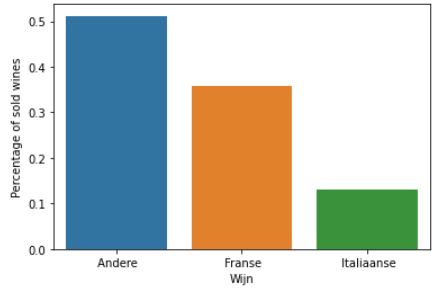

AttributeError: ignored

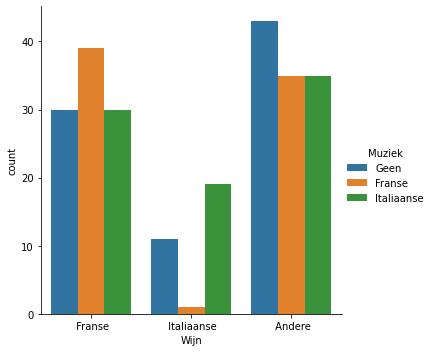

In [ ]:
subset = sns.catplot(data=mw, x='Wijn', hue='Muziek', kind='count' )  ##Is niet gelukt, moet eruit zien als degene erboven. #deze lijn is iets fout
sns.countplot(data=subset,x='Wijn')   #deze lijn klopt

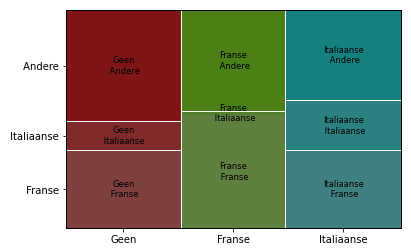

In [ ]:
mosaic(data=mw, index=['Muziek','Wijn']);

Plot a clustered bar chart of the dataset  

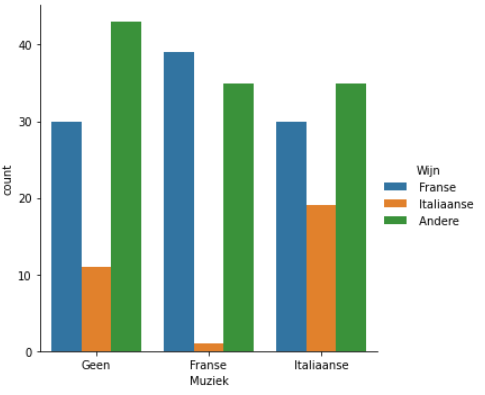

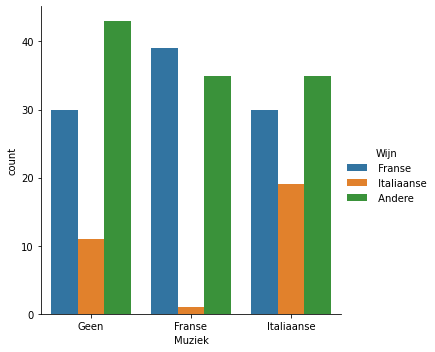

In [ ]:
sns.catplot(data=mw, hue='Wijn', x='Muziek', kind='count' )

Plot a bar chart (stacked bar chart) of the dataset

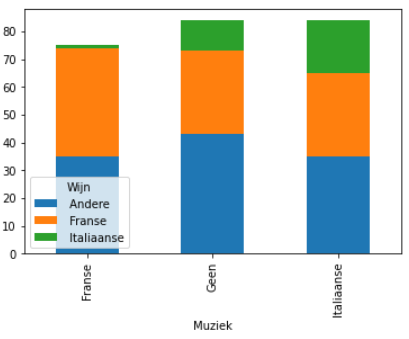

## Labo 2 - Survey

Load the data file data/survey.csv. It contains the result of a survey of students from an Australian university.

We want to investigate the relationship between some discrete (nominal or ordinal) variables in this dataset. For any pairs of variables listed below, follow these steps:

* First, think about what exactly you expect for the given combination of variables.
* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
- Looking at the chart, do you expect a rather high or rather low value for the $\chi^2$ statistic? Why?
* Run the $\chi^2$ test to determine whether there is a relationship between the two variables. Calculate the $\chi^2$ statistic, the critical limit $g$ and the $p$ value, each for significance level $\alpha = 0.05$.
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the $\chi^2$ test?


The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Read the dataset.

In [18]:
survey = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/survey.csv')
survey.Exer = survey.Exer.astype(CategoricalDtype(categories=['None', 'Some', 'Freq'], ordered=True))        #Gaat er voor zorgen dat de data op deze volgorde wordt geordend als je het wilt crosstablen
survey.Smoke = survey.Smoke.astype(CategoricalDtype(categories=['Never', 'Occas', 'Regul', 'Heavy'], ordered=True))
survey

,Unnamed: 0,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,2,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,3,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,4,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,233,Female,18.0,18.0,Right,L on R,85.0,Right,Some,Never,165.1,Imperial,17.667
233,234,Female,18.5,18.0,Right,L on R,88.0,Right,Some,Never,160.0,Metric,16.917
234,235,Female,17.5,16.5,Right,R on L,NaN,Right,Some,Never,170.0,Metric,18.583
235,236,Male,21.0,21.5,Right,R on L,90.0,Right,Some,Never,183.0,Metric,17.167


What are the different values for Exer and Smoke?  
Change both variables to ordinal variables with a specific order.

In [21]:

cross = pd.crosstab(survey.Smoke, survey.Exer)
cross

Exer,None,Some,Freq
Smoke,,,
Never,18,84,87
Occas,3,4,12
Regul,1,7,9
Heavy,1,3,7


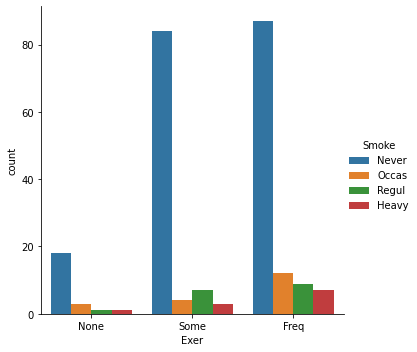

In [22]:
sns.catplot(data=survey, x='Exer', hue='Smoke', kind='count')

* Make a frequency table for the two variables. The (presumably) independent variable comes first.
* Plot a graph visualizing the relationship between the two variables.
* Looking at the chart, do you expect a rather high or rather low value for the  χ2  statistic? Why?
* Run the  χ2  test to determine whether there is a relationship between the two variables. Calculate the  χ2  statistic, the critical limit  g  and the  p  value, each for significance level  α=0.05 .
* Should we accept or reject the null hypothesis? What exactly does that mean for the relationship between the two variables? In other words, formulate an answer to the research question.
* Calculate Cramér's V. Do you come to a similar conclusion as with the  χ2  test?

The variables to be investigated:

| Independent variabele          | Dependent variabele                        |
|:------------------------------ |:-------------------------------------------|
| `Exer` (practicing sports)     | `Smoke`                                    |
| `Sex` (gender)                 | `Smoke`                                    |
| `W.Hnd` (dominant hand)        | `Fold` (top hand when you cross your arms) |
| `Sex`                          | `W.Hnd`                                    |

Results of the main calculations (rounded up to 3 decimal places):

- `Exer/Smoke`: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483
- `W.Hnd/Fold`: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454
- `Sex/Smoke`: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314
- `Sex/W.Hnd`: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

Exer/Smoke: χ² ≈ 5.489, g ≈ 12.592, p ≈ 0.483

In [47]:
observed = pd.crosstab(survey.Exer, survey.Smoke)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()

print(row_sums)
print(col_sums)
print(f'Number of observations: {n}')

Exer
None     23
Some     98
Freq    115
dtype: int64
Smoke
Never    189
Occas     19
Regul     17
Heavy     11
dtype: int64
Number of observations: 236


In [48]:
expected = np.outer(row_sums, col_sums) / n
expected

array([[18.41949153,  1.85169492,  1.65677966,  1.0720339 ],
       [78.48305085,  7.88983051,  7.05932203,  4.56779661],
       [92.09745763,  9.25847458,  8.28389831,  5.36016949]])

In [49]:
diffs = (expected - observed)**2 / expected
print(diffs)

Smoke     Never     Occas     Regul     Heavy
Exer                                         
None   0.009554  0.712107  0.260360  0.004840
Some   0.387813  1.917757  0.000499  0.538112
Freq   0.282137  0.811793  0.061903  0.501671


In [50]:
chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)                          #De verbetering staat boven de code blokken
                                                          # Er wordt een snelere manier getoond in de 4e oefeninging, lees de groene tekst

alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)

g = stats.chi2.isf(alpha, df = dof)
print("g     : %.4f" % g)

p = stats.chi2.sf(chi_squared, df=dof)
print("p-value            : %.4f" % p)

χ² ≈ 5.489
g     : 12.5916
p-value            : 0.4828


W.Hnd/Fold: χ² ≈ 1.581, g ≈ 5.992, p ≈ 0.454

In [54]:
observed = pd.crosstab( survey['W.Hnd'],survey.Fold)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()
expected =  np.outer(row_sums, col_sums) / n
diffs = (expected - observed)**2 / expected

chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)            #Oplossing staat boven de code
alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)

g = stats.chi2.isf(alpha, df = dof)
print("g     : %.4f" % g)

p = stats.chi2.sf(chi_squared, df=dof)
print("p-value            : %.4f" % p)



χ² ≈ 1.581
g     : 5.9915
p-value            : 0.4535


Sex/Smoke: χ² ≈ 3.554, g ≈ 7.815, p ≈ 0.314

In [86]:
observed = pd.crosstab(survey.Sex, survey.Smoke)
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()
expected =  np.outer(row_sums, col_sums) / n
diffs = (expected - observed)**2 / expected

chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)            #Oplossing staat boven de code   
alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)

g = stats.chi2.isf(alpha, df = dof)
print("g     : %.4f" % g)

p = stats.chi2.sf(chi_squared, df=dof)
print("p-value            : %.4f" % p)


χ² ≈ 3.554
g     : 7.8147
p-value            : 0.3139


Sex/W.Hnd: χ² ≈ 0.236, g ≈ 3.842, p ≈ 0.627

In [80]:
observed = pd.crosstab (survey.Sex, survey['W.Hnd'])
row_sums = observed.sum(axis=1)
col_sums = observed.sum()
n = row_sums.sum()
expected =  np.outer(row_sums, col_sums) / n
diffs = (expected - observed)**2 / expected





chi_squared = diffs.values.sum()
print('χ² ≈ %.3f' %chi_squared)            #Oplossing staat boven de code
alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)

g = stats.chi2.isf(alpha, df = dof)
print("g     : %.4f" % g)

p = stats.chi2.sf(chi_squared, df=dof)
print("p-value            : %.4f" % p)



χ² ≈ 0.544
g     : 3.8415
p-value            : 0.4610


In [90]:
#dit is een 2e manier om het veel sneller te bereken
observed = pd.crosstab (survey['W.Hnd'],survey.Sex)

chi_squared,p,df,expected= stats.chi2_contingency(observed)
alpha = .05
dimensions = observed.shape
dof = (dimensions[0]-1) * (dimensions[1]-1)
g = stats.chi2.isf(alpha, df=dof)

print('χ² ≈ %.3f' %chi_squared) 
print("defrees of freedom: %.3f" % df )
print("g     : %.3f" % g)
print("p-value            : %.3f" % p)

χ² ≈ 0.236
defrees of freedom: 1.000
g     : 3.841
p-value            : 0.627


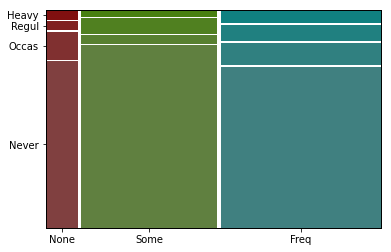

In [58]:
mosaic (data = survey, index=['Exer','Smoke'], gap=0.01, labelizer=lambda k:'');

## Labo 3 - Digimeter

Every year, Imec (formerly iMinds) carries out a study on the use of digital technologies in Flanders, the Digimeter (Vanhaelewyn & De Marez, 2016). In this exercise we will check whether the sample of the Digimeter 2016 (n = 2164) is representative of the population in terms of the age categories of the participants.

You can find the frequency tables in the following data files:

- `data/leeftijden-digimeter.csv`: relative frequencies of the age of participants in the iMec Digimeter 2016 and the Flemish population (as reported in the Digimeter publication)
- `data/leeftijden-bestat-vl.csv`: absolute frequencies for the different age categories of the Flemish population (Source: BelStat, <https://bestat.economie.fgov.be/bestat/> , C01.1: Population by place of residence (province), sex, position in the household (C), marital status and age (B)).  


1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.
2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate this.
3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.
4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?

Results of the main calculations (rounded up to 3 decimal places):

- χ² ≈ 6.700 (df = 6),
- g ≈ 12.592,
- p ≈ 0.350

Read the dataset `data/leeftijden-digimeter.csv`  
Make sure the Percentages are actually percentages.


In [112]:
digi = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/leeftijden-digimeter.csv')
digi['observed_p'] = digi.Percentage/100
digi

,Leeftijdsgroep,Percentage,observed_p
0,15-19,6.6,0.066
1,20-29,14.2,0.142
2,30-39,15.0,0.150
3,40-49,16.3,0.163
4,50-59,17.3,0.173
5,60-64,7.3,0.073
6,64+,23.2,0.232


Read the dataset `leeftijden-bestat-vl.csv`

In [107]:
bestat = pd.read_csv('https://raw.githubusercontent.com/arnauddormaels/Data-Science-and-AI/main/data/leeftijden-bestat-vl.csv')
bestat

,age.group,population
0,0-5,352017
1,5-9,330320
2,10-14,341303
3,15-19,366648
4,20-24,375469
5,25-29,387131
6,30-34,401285
7,35-39,409587
8,40-44,458485
9,45-49,493720


1. The table with age data for the Flemish population as a whole has more categories than the one used in the Digimeter. Make a summary so that you have the same categories as those of the Digimeter.

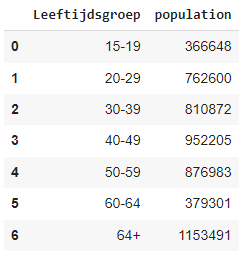

In [134]:
#bestat.iloc[3,1] neemt de waarde uit de tabel op rij 3
#bestat.iloc[4:6,1] neemt de waarde uit de tabel van op rij 4 tot 5 (niet tot en met 6)

#maakt array met de juiste leeftijdsgroepen zoals in het voorbeeld hierboven
digi['population']= [
                       bestat.iloc[3,1],    #15-19
 bestat.iloc[4:6,1].sum(),  #20-29
 bestat.iloc[6:8,1].sum(), #30-39
 bestat.iloc[8:10,1].sum(), #40-49
 bestat.iloc[10:12,1].sum(),#50-59
 bestat.iloc[12,1],         #60-64
 bestat.iloc[13:21,1].sum() #+64
 ]

pop_n=digi.population.sum()
digi


,Leeftijdsgroep,Percentage,observed_p,population
0,15-19,6.6,0.066,366648
1,20-29,14.2,0.142,762600
2,30-39,15.0,0.150,810872
3,40-49,16.3,0.163,952205
4,50-59,17.3,0.173,876983
5,60-64,7.3,0.073,379301
6,64+,23.2,0.232,1153491


2. In order to apply the goodness-of-fit test, we need the absolute frequencies of the observed values ​​in the sample. Calculate these.  
Answer = [142.824 307.288 324.6   352.732 374.372 157.972 502.048]

In [167]:
digi['observed'] =digi.observed_p*2164
digi
n_sample=digi.observed.sum()   #steekproef grootte
pop_n= digi.population.sum()   #populatie grootte


3. Also calculate the expected percentages ($\pi_i$) for the population as a whole.  
Answer = [0.06915147 0.1438298  0.15293412 0.17959016 0.16540295 0.07153788
 0.21755361]

In [169]:

digi['expected_p']=digi.population /pop_n
digi['expected']=digi.expected_p * n_sample

digi

,Leeftijdsgroep,Percentage,observed_p,population,observed,stdres,expected_p,expected
0,15-19,6.6,0.066,366648,142.824,NaN,0.069151,149.494134
1,20-29,14.2,0.142,762600,307.288,NaN,0.143830,310.936447
2,30-39,15.0,0.150,810872,324.600,NaN,0.152934,330.618487
3,40-49,16.3,0.163,952205,352.732,NaN,0.179590,388.244478
4,50-59,17.3,0.173,876983,374.372,NaN,0.165403,357.574059
5,60-64,7.3,0.073,379301,157.972,NaN,0.071538,154.653167
6,64+,23.2,0.232,1153491,502.048,NaN,0.217554,470.315228


4. Perform the goodness-of-fit test on the distribution of age categories in the Digimeter sample. In this respect, is the sample indeed representative of the Flemish population?  

Results of the main calculations (rounded up to 3 decimal places):

χ² ≈ 6.700 (df = 6),
g ≈ 12.592,
p ≈ 0.350

In [174]:
chi2,p = stats.chisquare(f_obs=digi.observed, f_exp=digi.expected)
print('χ² ≈ %.3f' %chi2)
#foutje in deze lijn g = stats.chi2.isf(0.05, leng(digi)-1)
print('p ≈ %.3f' %p) 

IndentationError: ignored